In [7]:
# Load libraries

suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(monocle3))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(tidyverse))

set.seed(42)

ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


In [ ]:
# Files directory

monocole_3_learned_object_RDS_direction <- "/home/arsham79/scratch/nsclc/results/monocole3_cds_objectd_trained.rds"
monocole_3_DEGs_RDS_direction <- "/home/arsham79/scratch/nsclc/results/DEGs_monocole3.rds"

In [ ]:
cds <- readRDS(monocole_3_learned_object_RDS_direction)

In [ ]:
plot_cells(cds, color_cells_by = "partition", label_branch_points=FALSE, label_leaves=FALSE)

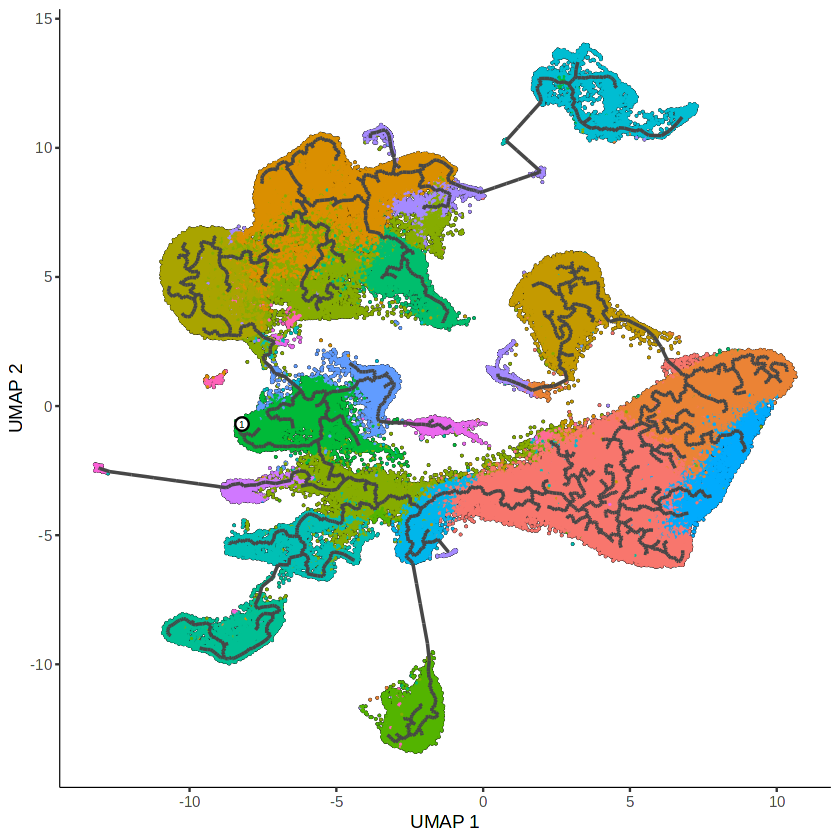

In [7]:
plot_cells(cds, color_cells_by = "cell_type", label_groups_by_cluster=FALSE, label_leaves=FALSE, label_branch_points=FALSE, labels_per_group = FALSE)

Cells aren't colored in a way that allows them to be grouped.



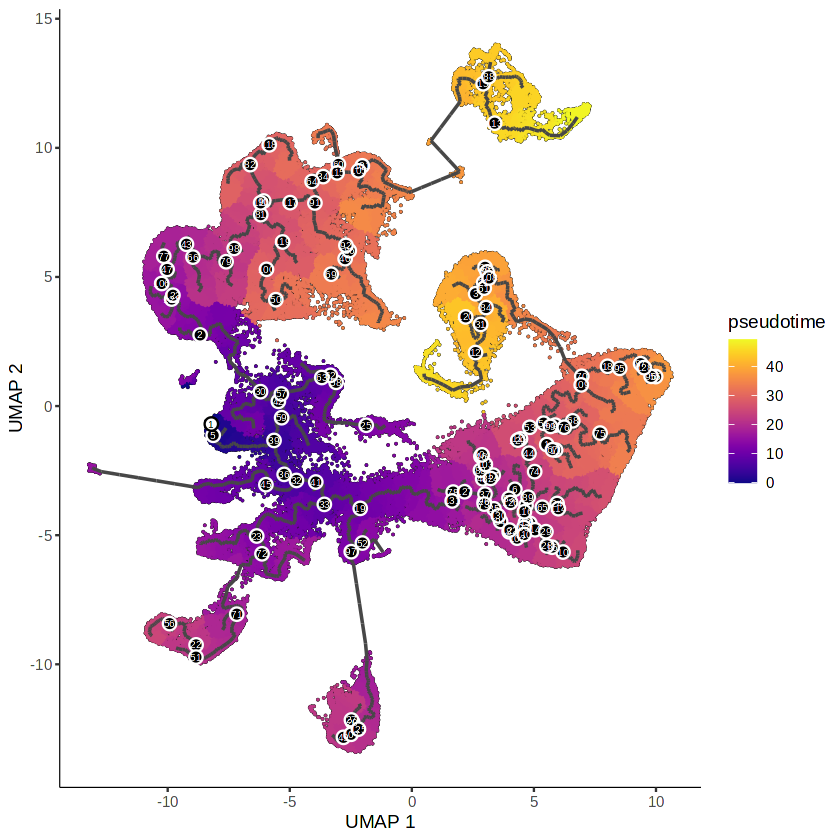

In [8]:
plot_cells(cds, color_cells_by = "pseudotime", label_groups_by_cluster=FALSE, label_leaves=FALSE, label_branch_points=TRUE)

In [9]:
cds$pseudotime_value <- pseudotime(cds)
pseudotime_df <- as.data.frame(colData(cds))

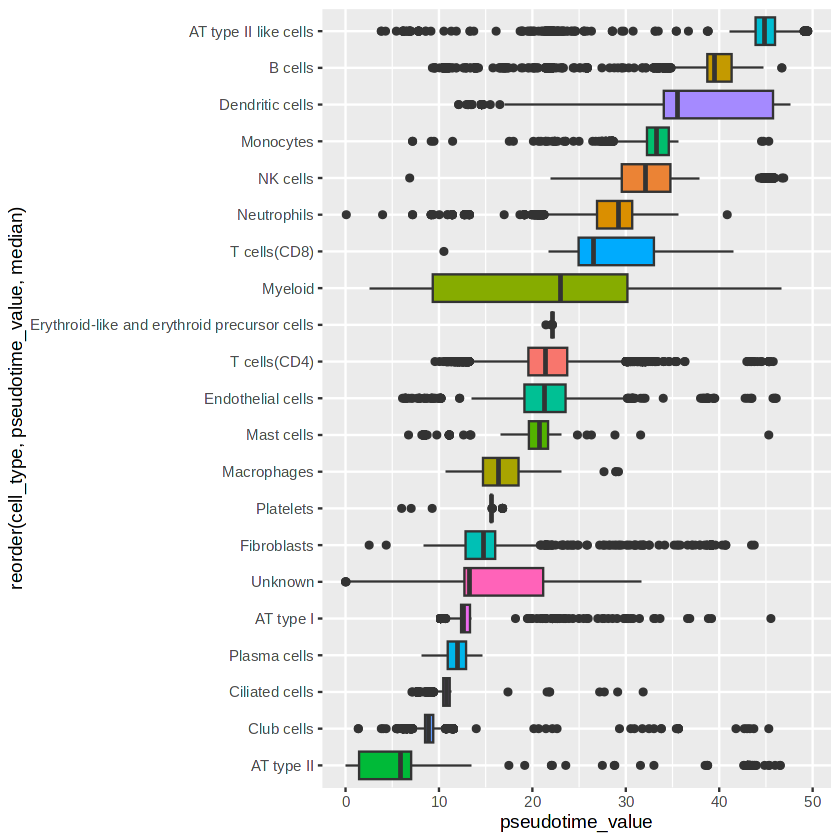

In [10]:
ggplot(pseudotime_df, aes(x = pseudotime_value, y = reorder(cell_type, pseudotime_value, median), fill = cell_type)) + geom_boxplot() + NoLegend()

In [5]:
degs <- readRDS(monocole_3_DEGs_RDS_direction)
degs <- as.data.table(degs)

In [6]:
degs <- degs[degs$num_cell_expressed > 9601,]

In [7]:
degs <- degs[degs$morans_I > 0.100878,]

In [8]:
genes_to_assess <- degs$gene_short_name

In [9]:
cds <- preprocess_cds(cds)

In [10]:
gene_module_df <- find_gene_modules(cds[genes_to_assess,], resolution=0.01)

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’



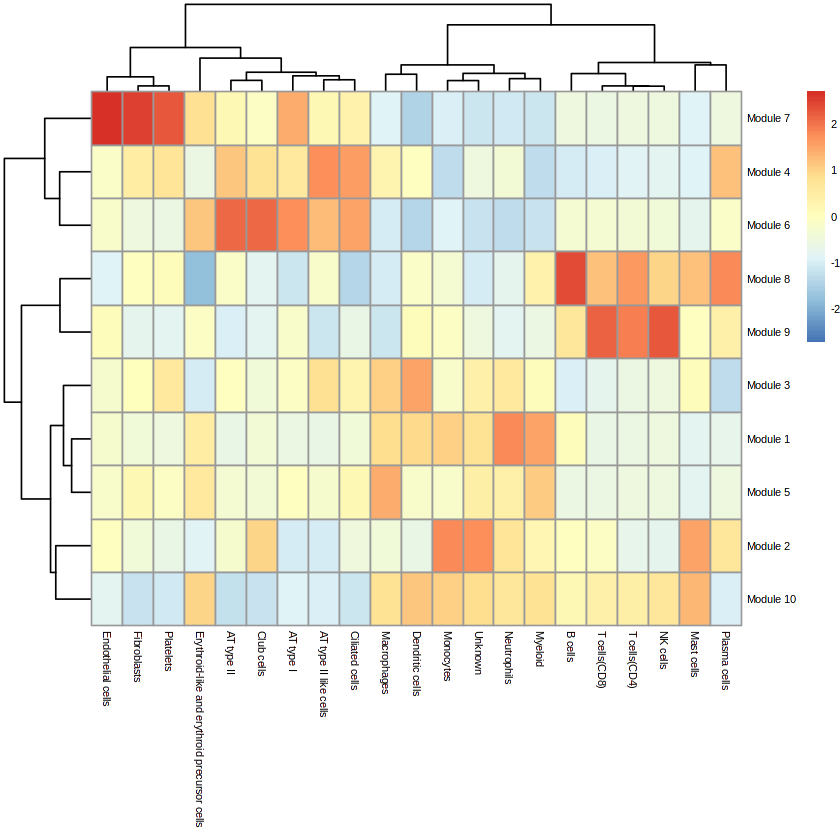

In [11]:
cell_group_df <- tibble::tibble(cell=row.names(colData(cds)), 
                                cell_group= colData(cds)$cell_type)
agg_mat <- aggregate_gene_expression(cds, gene_module_df, cell_group_df)
row.names(agg_mat) <- stringr::str_c("Module ", row.names(agg_mat))
colnames(agg_mat) <- stringr::str_c(colnames(agg_mat))

pheatmap::pheatmap(agg_mat, cluster_rows=TRUE, cluster_cols=TRUE,
                   scale="column", clustering_method="ward.D2",
                   fontsize=6)

In [12]:
options(warn = -1)

gene_module_dt <- as.data.table(gene_module_df)
target_genes_immune <- gene_module_dt[gene_module_df$module == c(8,9), id]
target_genes_lung_cells <- gene_module_dt[gene_module_df$module == c(4,6), id]

options(warn = 1)

In [13]:
write.table(target_genes_immune, "/home/arsham79/scratch/nsclc/results/targeted_genes_monocole3_immune_cells.txt", 
            quote = FALSE, sep = "\t", eol = "\n", row.names = FALSE, col.names = FALSE)

write.table(target_genes_lung_cells, "/home/arsham79/scratch/nsclc/results/targeted_genes_monocole3_lung_cells.txt", 
            quote = FALSE, sep = "\t", eol = "\n", row.names = FALSE, col.names = FALSE)

In [17]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: FlexiBLAS IMKL;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] lubridate_1.9.3             forcats_1.0.0              
 [3] stringr_1.5.1               dplyr_1.1.4                
 [5] purrr_1.0.2                 readr_2.1.4                
 [7] tidyr_1.3.0                 tibble_3.2.1               
 [9] tidyvers